In [1]:
using Pkg

Pkg.activate("ermacpr25")
Pkg.instantiate()

  Activating project at `~/personal/working/minicurso-empacotamento/ermacpr25`


In [2]:
using LinearAlgebra, Plots

In [9]:
include("ermacpr25/src/ermacpr25.jl")

plota_solucao

# O que é um problema de empacotamento?

## Uma definição simples

Em problemas de empacotamento, desejamos **alocar** objetos em **contêineres**.

Problemas de empacotamento aparecem em diversas áreas

  - Alocação de objetos em caixas
  - Alocação de objetos em caminhões
  - Cortes de peças
  - Simulações com proteínas
  - Organização de ambientes
  - Muito, muito mais

## Mais informações

  - HIFI, Mhand; M′ HALLAH, Rym. **A literature review on circle and sphere packing problems: Models and methodologies**. Advances in Operations Research, v. 2009, n. 1, p. 150624, 2009
  - LEAO, Aline AS et al. **Irregular packing problems: A review of mathematical models**. European Journal of Operational Research, v. 282, n. 3, p. 803-822, 2020
  - E. Spetch, **Packomania**, `http://packomania.com/`, 2025

## Empacotamento de círculos e esferas

![circle-packing](figures/circle-packing.jpeg)

![sphere-packing](figures/sphere-packing.jpeg)

### Sala Planejada

![sala-planejada](figures/sala-planejada.png)

### Empacotamento de triângulos

![triangle-packing](figures/triangle-packing.png)

### Empacotamento em 2 níveis

![bilevel](figures/padeiro1.jpg)

### Polígonos regulares ou irregulares

![irregular](figures/irregular-packing.jpg)

### Definição do problema

  - Temos um conjunto com $N$ itens
      - Círculos
      - Quadrados
      - Polígonos
      - Esferas
      - Elipsoides
      - **Triângulos**

  - Temos um contêiner
      - Círculos, esferas
      - Quadrados, cubos
      - Retângulos, _strips_
      - Polígonos

  - Devemos **alocar** o máximo de itens no contêiner
  - Devemos encontrar o "menor" contêiner que os contém
  - Podemos ter objetos idênticos ou não
  - Não pode haver **sobreposição**

$$
\begin{array}{ll}
\min & \text{área, perímetro, nada \dots} \\
\text{suj. a} & \text{Não sobreposição} \\
& \text{Pertinência} \\
\end{array}
$$

# Sobreposição de dois círculos?

Modifique os valores abaixo e veja o valor da sobreposição

In [22]:
c1 = [1, 1]
r1 = 1

c2 = [1, 2]
r2 = 1

s = norm(c2 - c1) - (r1 + r2)

println("Sobreposição = $s")

Sobreposição = -1.0


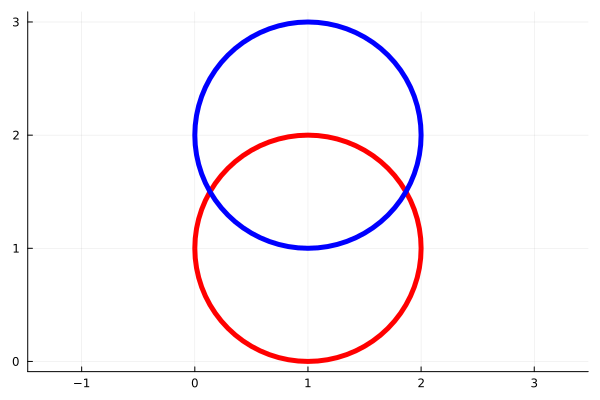

In [23]:
plot(circulo(c1, r1), c=false, lc=:red, lw=5, label=false, aspect_ratio=true)
plot!(circulo(c2, r2), c=false, lc=:blue, lw=5, label=false)

# Sobreposição entre quadrados

## Sem rotação

In [39]:
v1 = [1, 1]
l1 = 2

v2 = [2, 2]
l2 = 2

overlap1 = max(0.0, v1[1] + l1 / 2 - (v2[1] - l2 / 2)) * 
           max(0.0, v2[1] + l2 / 2 - (v1[1] - l1 / 2)) * 
           max(0.0, v1[2] + l1 / 2 - (v2[2] - l2 / 2)) * 
           max(0.0, v2[2] + l2 / 2 - (v1[2] - l1 / 2))

overlap2 = max(0.0, v1[1] + l1 / 2 - (v2[1] - l2 / 2))^2 *
           max(0.0, v2[1] + l2 / 2 - (v1[1] - l1 / 2))^2 * 
           max(0.0, v1[2] + l1 / 2 - (v2[2] - l2 / 2))^2 * 
           max(0.0, v2[2] + l2 / 2 - (v1[2] - l1 / 2))^2

println("Medida de sobreposição: $overlap1")
println("Medida de sobreposição (diferenciável): $overlap2")

Medida de sobreposição: 9.0
Medida de sobreposição (diferenciável): 81.0


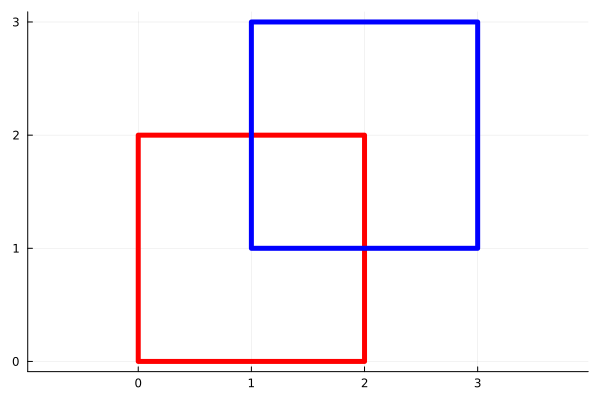

In [40]:
plot(quadrado(v1, l1), c=false, lc=:red, lw=5, label=false, aspect_ratio=true)
plot!(quadrado(v2, l2), c=false, lc=:blue, lw=5, label=false, aspect_ratio=true)

## Com rotação

Quando ocorre rotação, a medida simplificada de sobreposição pode não ser correta.

In [67]:
v1 = [1, 0]
l1 = 2
θ1 = π / 4

v2 = [2, 2]
l2 = 3
θ2 = π / 2

1.5707963267948966

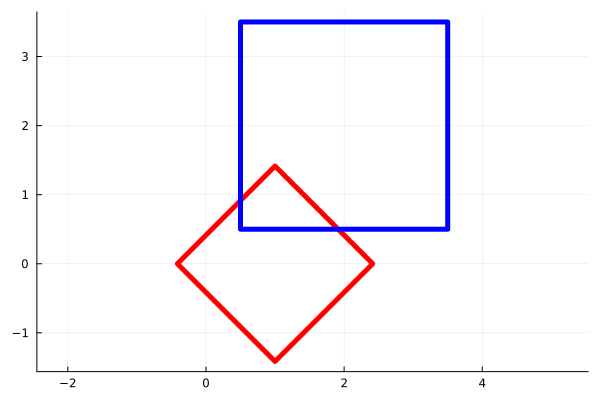

In [68]:
plot(quadrado(v1, l1, θ1), c=false, lc=:red, lw=5, label=false, aspect_ratio=true)
plot!(quadrado(v2, l2, θ2), c=false, lc=:blue, lw=5, label=false, aspect_ratio=true)

In [60]:
quadrado_base(l) = [[-l/2 -l/2], [l/2 -l/2], [l/2 l/2], [-l/2 l/2]]

quadrado_base (generic function with 1 method)

In [73]:
# Sobreposição com um quadrado SEM rotação
medida_dentro_quad(v, l, p) = max(0.0, p[1] - (v[1] - l / 2)) * 
                              max(0.0, v[1] + l / 2 - p[1]  ) *
                              max(0.0, p[2] - (v[2] - l / 2)) *
                              max(0.0, v[2] + l / 2 - p[2]  )

medida_dentro_quad (generic function with 1 method)

In [70]:
rotaciona_desloca(v, θ, p) = [v[1] + cos(θ) * p[1] - sin(θ) * p[2],
                              v[2] + sin(θ) * p[1] + cos(θ) * p[2]]

rotaciona_desloca_inv(v, θ, p) = [cos(-θ) * (p[1] - v[1]) - sin(-θ) * (p[2] - v[2]),
                                  sin(-θ) * (p[1] - v[1]) + cos(-θ) * (p[2] - v[2])]

rotaciona_desloca_inv (generic function with 1 method)

In [72]:
overlap3 = sum(medida_dentro_quad([0,0], l1, rotaciona_desloca_inv(v1, θ1, rotaciona_desloca(v2, θ2, p)))
               for p in quadrado_base(l2)) +
           sum(medida_dentro_quad([0,0], l2, rotaciona_desloca_inv(v2, θ2, rotaciona_desloca(v1, θ1, p)))
               for p in quadrado_base(l1))

println("Medida de sobreposição com rotação: $overlap3")

Medida de sobreposição com rotação: 2.883567811865475


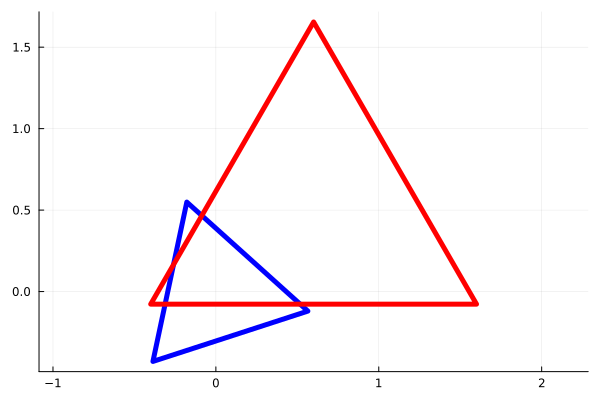

In [19]:
bc1 = [0, 0]
l1  = 1.0
θ1  = π / 10

bc2 = [0.6, 0.5]
l2 = 2.0
θ2 = 0.0

plot(triangulo_eq(bc1, θ1, l1), c=false, lc=:blue, lw=5, label=false, aspect_ratio=true)
plot!(triangulo_eq(bc2, θ2, l2), c=false, lc=:red, lw=5, label=false, aspect_ratio=true)

In [10]:
_triangulo_base

3×2 Matrix{Float64}:
 -0.5  -0.288675
  0.5  -0.288675
  0.0   0.57735